In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [3]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

2024-09-13 20:30:57.496512: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/martin/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorFlow version:  2.17.0


In [4]:
import tensorboard
tensorboard.__version__

'2.17.1'

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Sample data: (time_steps, features)
data = np.array([[i, i + 1] for i in range(100)])  # Use exp(i / 10) to keep values manageable
X = data[:-1]  # All but the last
y = data[1:, 0]  # Predict the first feature of the next time step

# Reshape data for LSTM: (samples, time steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
model.fit(X, y, 
          epochs=200, 
          verbose=0,
          callbacks=[tensorboard_callback])

# Make predictions
predictions = model.predict(X)
print(predictions)

/home/martin/miniconda3/envs/jupyter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[ 0.54816055]
 [ 1.1934348 ]
 [ 2.0129402 ]
 [ 2.9410205 ]
 [ 3.9247842 ]
 [ 4.9324417 ]
 [ 5.9481854 ]
 [ 6.965373  ]
 [ 7.9819565 ]
 [ 8.997869  ]
 [10.013717  ]
 [11.030201  ]
 [12.047901  ]
 [13.067201  ]
 [14.08832   ]
 [15.111322  ]
 [16.136168  ]
 [17.162724  ]
 [18.190817  ]
 [19.220232  ]
 [20.250732  ]
 [21.282087  ]
 [22.314056  ]
 [23.346418  ]
 [24.378962  ]
 [25.411491  ]
 [26.44383   ]
 [27.475819  ]
 [28.50733   ]
 [29.538233  ]
 [30.568434  ]
 [31.59784   ]
 [32.626392  ]
 [33.654037  ]
 [34.68073   ]
 [35.706436  ]
 [36.731144  ]
 [37.75484   ]
 [38.777527  ]
 [39.799202  ]
 [40.81989   ]
 [41.83958   ]
 [42.85833   ]
 [43.87613   ]
 [44.893017  ]
 [45.909027  ]
 [46.92418   ]
 [47.93851   ]
 [48.952053  ]
 [49.964836  ]
 [50.9769    ]
 [51.988255  ]
 [52.99896   ]
 [54.009026  ]
 [55.018486  ]
 [56.027393  ]
 [57.035748  ]
 [58.0436    ]
 [59.050953  ]
 [60.057858  ]
 [61.064323  ]
 [62.07038   ]
 [63.076054  ]
 [64.08136   ]
 [

In [6]:
model.predict(np.array([[70.0, 71.0]]).reshape(1, 1, 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


array([[71.10997]], dtype=float32)

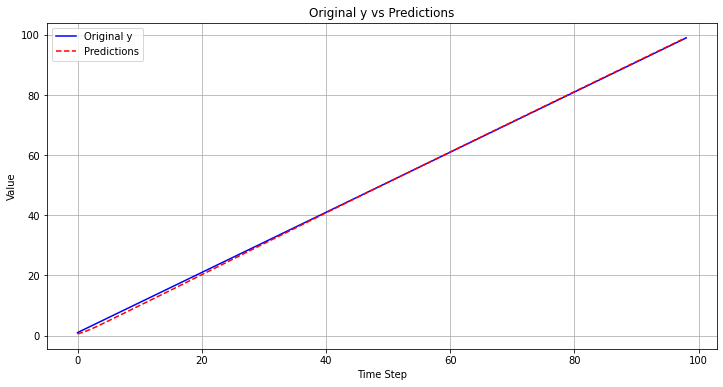

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from datetime import datetime
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# Plot original data and predictions
plt.figure(figsize=(12, 6))

# Plot original y values
plt.plot(y, label='Original y', color='blue')

# Plot predictions
plt.plot(predictions, label='Predictions', color='red', linestyle='--')

# Adding labels and title
plt.title('Original y vs Predictions')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [8]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 129761), started 0:13:02 ago. (Use '!kill 129761' to kill it.)